# **Kütüphanelerin İmport Edilmesi**

In [ ]:
# Veri Manipülasyonu İçin Kütüphanelerin İmport Edilmesi
import pandas as pd
import numpy as np

# Grafikler İçin Kütüphanelerin İmport Edilmesi
import seaborn as sns
import matplotlib.pyplot as plt

# Veri Ön İşleme İçin Kütüphanelerin İmport Edilmesi
from sklearn.preprocessing import  MinMaxScaler, LabelEncoder, StandardScaler

# Modele Holdout Yöntemi İle Veri Setini Eğitim ve Test Verisi Olarak Bölünmesi
from sklearn.model_selection import train_test_split , cross_val_score

# Regresyon Modelleri İçin Kütüphanelerin İmport Edilmesi
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb

# Model Sonuç Ölçüm İçin Kütüphanelerin İmport Edilmesi
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import metrics

# Hiperparametre Optimizasyonu
from sklearn.model_selection import GridSearchCV

# **Keşifçi Veri Analizi**

In [ ]:
df=pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
df.shape

(1338, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
df.index

RangeIndex(start=0, stop=1338, step=1)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [ ]:
df.count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [ ]:
df.isna()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [ ]:
df.isnull().values.any()

False

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Veriyi inceleyerek, analiz ederek veriden anlamlı sonuçlar çıkarınız**

In [ ]:
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [ ]:
df["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [ ]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

**Bmi(Vücut Kitle İndeksi)’nin dağılımını inceleyiniz**

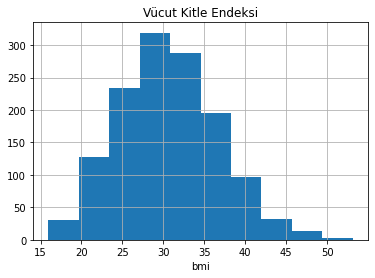

In [ ]:
df["bmi"].hist()
plt.xlabel("bmi")
plt.title("Vücut Kitle Endeksi")
plt.show()

**"smoker” ile “charges” arasındaki ilişkiyi inceleyiniz**

In [ ]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


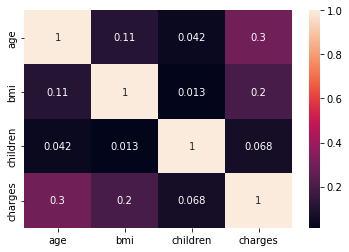

In [ ]:
corr=df.corr()
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
           annot=True)

In [ ]:
df.groupby("smoker")["charges"].mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

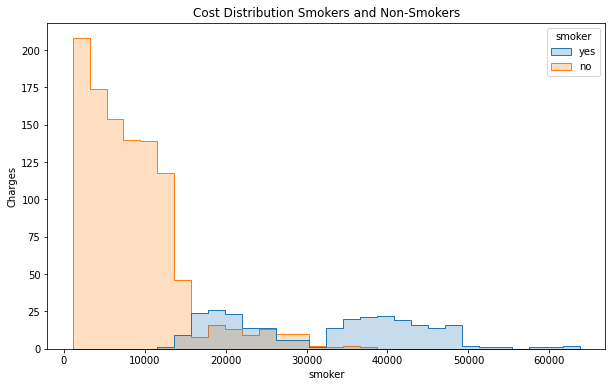

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Cost Distribution Smokers and Non-Smokers')
plt.xlabel('smoker')
plt.ylabel('Charges')
sns.histplot(x=df.charges, hue=df.smoker, element='step')

**“smoker” (Sigara tüketen) ile “region”(Bölge) arasındaki ilişkiyi inceleyiniz**

In [ ]:
df.groupby(["region","smoker"]).agg({"region":"count"})

region
region    smoker        
northeast no         257
          yes         67
northwest no         267
          yes         58
southeast no         273
          yes         91
southwest no         267
          yes         58

In [ ]:
df.groupby(["smoker","region"]).size().reset_index(name="count")

,smoker,region,count
0,no,northeast,257
1,no,northwest,267
2,no,southeast,273
3,no,southwest,267
4,yes,northeast,67
5,yes,northwest,58
6,yes,southeast,91
7,yes,southwest,58


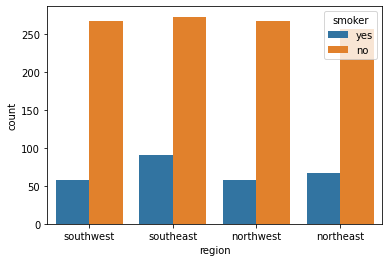

In [ ]:
sns.countplot(x="region",data=df,hue="smoker")

**“bmi” ile “sex”(Cinsiyet) arasındaki ilişkiyi inceleyiniz.**


In [ ]:
df.groupby("sex")["bmi"].mean()

sex
female    30.377749
male      30.943129
Name: bmi, dtype: float64

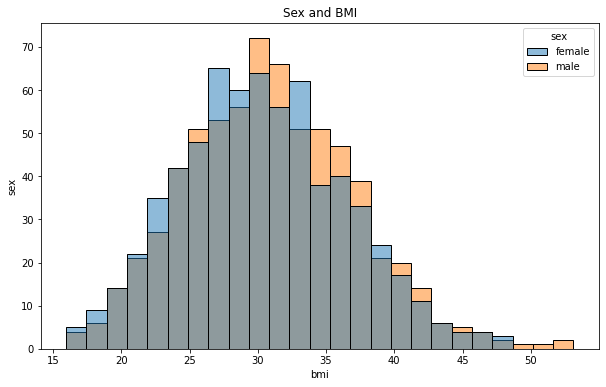

In [ ]:
plt.figure(figsize=(10 ,6))
plt.title('Sex and BMI')
plt.ylabel('sex')
plt.xlabel('bmi')
sns.histplot(x=df.bmi, hue=df.sex)

**En çok “children”’a sahip “region”’ı bulunuz.**

In [ ]:
df["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [ ]:
df[df["children"]==df["children"].max()]["region"].value_counts()

southwest    8
southeast    6
northeast    3
northwest    1
Name: region, dtype: int64

Text(0, 0.5, 'count')

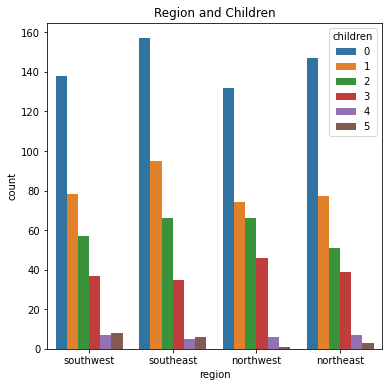

In [ ]:
plt.figure(figsize=(6, 6))
ax = sns.countplot(x=df.region, hue=df.children)
plt.title('Region and Children')
plt.ylabel('count')



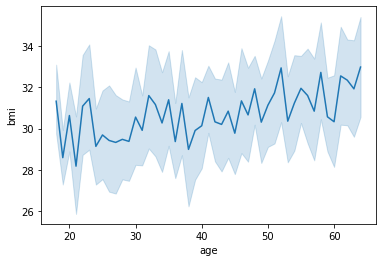

In [ ]:
sns.lineplot(x="age",y="bmi",data=df)

**“Age” ile “bmi” arasındaki ilişkiyi inceleyiniz.**


In [ ]:
df.loc[:,["age","bmi"]]

,age,bmi
0,19,27.900
1,18,33.770
2,28,33.000
3,33,22.705
4,32,28.880
...,...,...
1333,50,30.970
1334,18,31.920
1335,18,36.850
1336,21,25.800


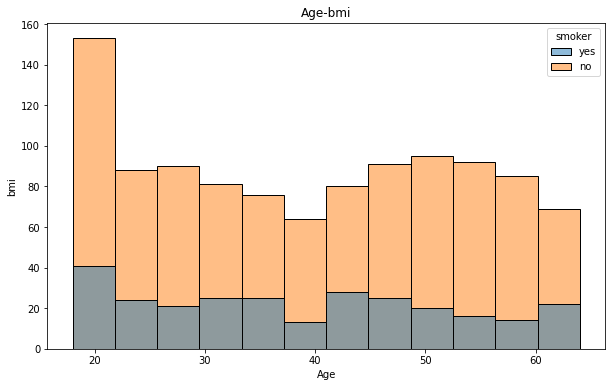

In [ ]:
plt.figure(figsize=(10 ,6))
plt.title('Age-bmi')
plt.ylabel('bmi')
plt.xlabel('Age')
sns.histplot(x=df.age, hue=df.smoker)

**“bmi” ile “children” arasındaki ilişkiyi inceleyiniz.**

In [ ]:
df.groupby("children")["bmi"].mean()

children
0    30.550296
1    30.623148
2    30.978104
3    30.684331
4    31.391200
5    29.605000
Name: bmi, dtype: float64

<Figure size 1008x576 with 0 Axes>

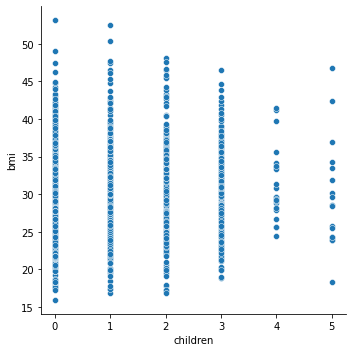

In [ ]:
plt.figure(figsize=(14, 8))
sns.relplot(x='children', y='bmi', data=df)

**“bmi” değişkeninde outlier var mıdır? İnceleyiniz.**

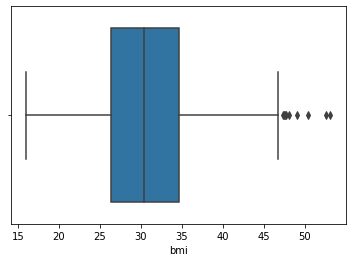

In [ ]:
sns.boxplot(x="bmi",data=df);
#Aykırı değer vardır.

**bmi” ile “charges” arasındaki ilişkiyi inceleyiniz**

In [ ]:
df[["bmi","charges"]]

,bmi,charges
0,27.900,16884.92400
1,33.770,1725.55230
2,33.000,4449.46200
3,22.705,21984.47061
4,28.880,3866.85520
...,...,...
1333,30.970,10600.54830
1334,31.920,2205.98080
1335,36.850,1629.83350
1336,25.800,2007.94500


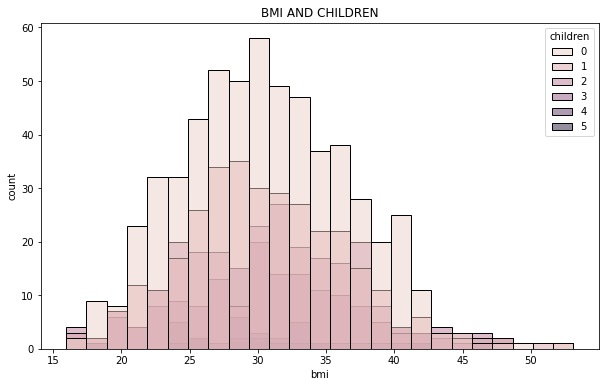

In [ ]:
plt.figure(figsize=(10 ,6))
plt.title('BMI AND CHILDREN')
plt.ylabel('count')
plt.xlabel('bmi')
sns.histplot(x=df.bmi, hue=df.children)

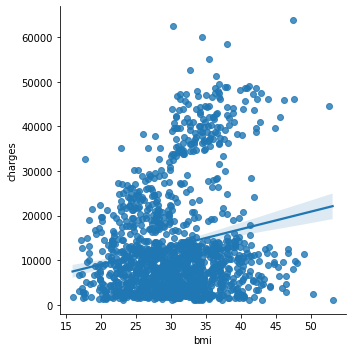

In [ ]:
sns.lmplot(x = "bmi", y="charges", data=df,)

**“region”, “smoker” ve “bmi” arasındaki ilişkiyi bar plot kullanarak inceleyiniz.**


<Figure size 1008x576 with 0 Axes>

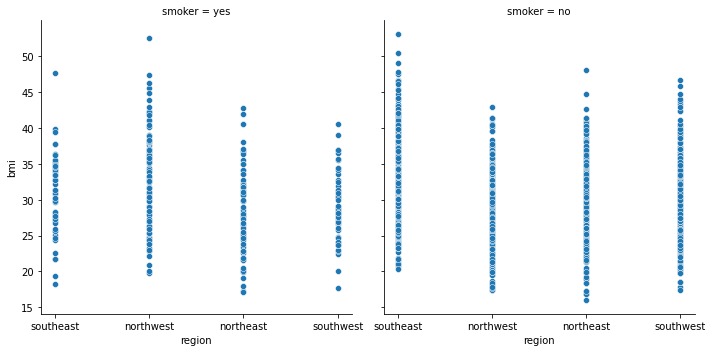

In [ ]:
plt.figure(figsize=(14, 8))
sns.relplot(x='region', y='bmi', col='smoker', data=df)

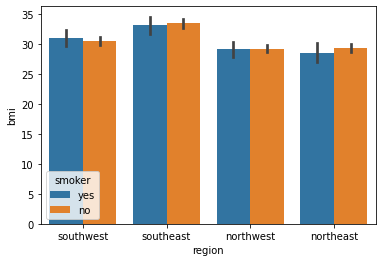

In [ ]:
sns.barplot(x="region",y="bmi",hue="smoker",data=df)

**“region”, “smoker” ve “bmi” arasındaki ilişkiyi bar plot kullanarak inceleyiniz.**

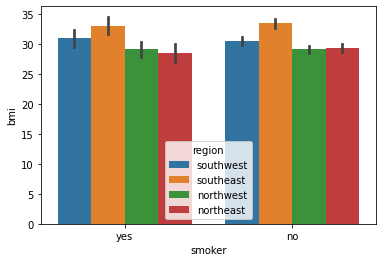

In [ ]:
sns.barplot(x="smoker",y="bmi",hue="region",data=df)

# **Veri Ön İşleme**

In [ ]:
X = df.drop('charges',axis=1)

In [ ]:
X

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [ ]:
y = df["charges"]

In [ ]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [ ]:
X.sex = [1 if each == "female" else 0 for each in X.sex]
X.smoker = [1 if each == "yes" else 0 for each in X.smoker]
X.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,southwest
1,18,0,33.770,1,0,southeast
2,28,0,33.000,3,0,southeast
3,33,0,22.705,0,0,northwest
4,32,0,28.880,0,0,northwest


In [ ]:
X = pd.get_dummies(X, columns= ["region"], drop_first= True)

In [ ]:
X

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,0,0,1
1,18,0,33.770,1,0,0,1,0
2,28,0,33.000,3,0,0,1,0
3,33,0,22.705,0,0,1,0,0
4,32,0,28.880,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,1,0,0
1334,18,1,31.920,0,0,0,0,0
1335,18,1,36.850,0,0,0,1,0
1336,21,1,25.800,0,0,0,0,1


## Standartlaştırma
* MinMaxScaler

In [ ]:
mms = MinMaxScaler()
for col in X.columns:
  X[col] = mms.fit_transform(X[[col]])

In [ ]:
X

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,0.021739,1.0,0.321227,0.0,1.0,0.0,0.0,1.0
1,0.000000,0.0,0.479150,0.2,0.0,0.0,1.0,0.0
2,0.217391,0.0,0.458434,0.6,0.0,0.0,1.0,0.0
3,0.326087,0.0,0.181464,0.0,0.0,1.0,0.0,0.0
4,0.304348,0.0,0.347592,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1333,0.695652,0.0,0.403820,0.6,0.0,1.0,0.0,0.0
1334,0.000000,1.0,0.429379,0.0,0.0,0.0,0.0,0.0
1335,0.000000,1.0,0.562012,0.0,0.0,0.0,1.0,0.0
1336,0.065217,1.0,0.264730,0.0,0.0,0.0,0.0,1.0


In [ ]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split #Holdout Yöntemi

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
X_train

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
693,0.130435,0.0,0.207022,0.0,0.0,1.0,0.0,0.0
1297,0.217391,1.0,0.283831,0.4,0.0,0.0,1.0,0.0
634,0.717391,0.0,0.638687,0.2,0.0,0.0,0.0,1.0
1022,0.630435,0.0,0.541297,0.2,1.0,0.0,1.0,0.0
178,0.608696,1.0,0.348130,0.4,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
1095,0.000000,1.0,0.414044,0.8,0.0,0.0,0.0,0.0
1130,0.456522,1.0,0.212806,1.0,0.0,0.0,1.0,0.0
1294,0.869565,0.0,0.247915,0.0,0.0,0.0,0.0,0.0
860,0.413043,1.0,0.851224,0.4,1.0,0.0,0.0,1.0


In [ ]:
X_test

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
764,0.586957,1.0,0.247915,0.4,0.0,0.0,0.0,0.0
887,0.391304,1.0,0.378262,0.0,0.0,1.0,0.0,0.0
890,1.000000,1.0,0.293920,0.0,1.0,1.0,0.0,0.0
1293,0.608696,0.0,0.263250,0.6,0.0,1.0,0.0,0.0
259,0.021739,0.0,0.429379,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
342,0.913043,1.0,0.311811,0.0,0.0,0.0,0.0,0.0
308,0.869565,0.0,0.508609,0.0,0.0,0.0,0.0,0.0
1128,0.347826,0.0,0.453054,0.2,0.0,0.0,0.0,1.0
503,0.021739,0.0,0.384450,0.0,1.0,0.0,1.0,0.0


In [ ]:
y_train

693      2352.96845
1297     4340.44090
634      9391.34600
1022    42211.13820
178      8823.27900
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1003, dtype: float64

In [ ]:
y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
342     13217.09450
308     11944.59435
1128    14358.36437
503     32548.34050
1197     5699.83750
Name: charges, Length: 335, dtype: float64

# **Model Seçme**

## **Linear Regression**

* y = b + w1*X1 + w2*X2 + w3*X3
* Sabit değer b - bias değeri:
* Ağırlık (w) değerleri
* x1, x2, .... xn: age	sex	bmi	children	smoker	region_northwest	region_southeast	region_southwest

* Model Oluşturma

In [ ]:
r_m = LinearRegression()

In [ ]:
r_m = r_m.fit(X_train, y_train)

* b (Sabit Değer)

In [ ]:
r_m.intercept_

-1996.3159153394117

* Ağırlıklar
* w1, w2, ..... w8

In [ ]:
r_m.coef_

array([11942.68712197,   -45.62242749, 12630.55300389,  2132.51361372,
       23630.3989903 ,  -355.14862133,  -781.36838892,  -860.26671223])

## **Tahmin**

In [ ]:
y_pred = r_m.predict(X_test)

In [ ]:
y_pred[:5]

array([ 8952.20855705,  7053.79716786, 36888.36911226,  9522.49758674,
       26961.84638217])

## **Model Başarısı**

* MSE

In [ ]:
cv_results = -cross_val_score(r_m, X_train, y_train, cv=10, scoring= "neg_mean_squared_error")

In [ ]:
np.sqrt(cv_results).mean()

6114.109519605433

* RMSE

In [ ]:
cv_rmse = -cross_val_score(r_m, X_train, y_train, cv=10, scoring= "neg_root_mean_squared_error")

In [ ]:
cv_rmse.mean()

6114.109519605433

* MAE

In [ ]:
cv_results2 = -cross_val_score(r_m, X_train, y_train, cv=10, scoring= "neg_mean_absolute_error")

In [ ]:
cv_results2.mean()

4220.094429433615

* r2

In [ ]:
cv_r2 = cross_val_score(r_m, X_train, y_train, cv=2, scoring= "r2")

In [ ]:
cv_r2.mean()

0.7407882232368561

## **Decision Tree Regressor**

* Model Oluşturma

In [ ]:
dt_model = DecisionTreeRegressor()

In [ ]:
dt_model = dt_model.fit(X_train, y_train)

## **Tahmin**

In [ ]:
y_pred = dt_model.predict(X_test)

* Tahmin sonuçlarımızın ilk beş gözlemini inceleyelim.

In [ ]:
y_pred[:5]

array([ 9447.25035,  5266.3656 , 28950.4692 , 30284.64294, 33732.6867 ])

## **Model Başarısı**

* MSE

In [ ]:
cv_mse = -cross_val_score(dt_model, X_train, y_train, cv=10, scoring= "neg_mean_squared_error")

In [ ]:
cv_mse.mean()

49275867.725277014

* RMSE

In [ ]:
cv_rmse = -cross_val_score(dt_model, X_train, y_train, cv=10, scoring= "neg_root_mean_squared_error")

In [ ]:
cv_rmse.mean()

6820.078385387761

* MAE

In [ ]:
cv_mae = -cross_val_score(dt_model, X_train, y_train, cv=10, scoring= "neg_mean_absolute_error")

In [ ]:
cv_mae.mean()

3496.6998647997525

* r2

In [ ]:
cv_r2 = cross_val_score(dt_model, X_train, y_train, cv=2, scoring= "r2")

In [ ]:
cv_r2.mean()

0.7022455512053083

## **GBM**

* Model Oluşturma

In [ ]:
gbm = GradientBoostingRegressor()

In [ ]:
gbm_model = gbm.fit(X_train, y_train)

## **Tahmin**

In [ ]:
y_pred = gbm_model.predict(X_test)

In [ ]:
y_pred[:5]

array([10804.40734029,  5511.19871513, 28568.25364636, 10278.37451985,
       34222.52376341])

## **Model Başarısı**

* MSE

In [ ]:
cv_mse = -cross_val_score(gbm_model, X_train, y_train, cv=10, scoring= "neg_mean_squared_error")

In [ ]:
cv_mse.mean()

21213817.14614096

* RMSE

In [ ]:
cv_rmse = -cross_val_score(gbm_model, X_train, y_train, cv=10, scoring= "neg_root_mean_squared_error")

In [ ]:
cv_rmse.mean()

4562.8664120763515

* MAE

In [ ]:
cv_mae = -cross_val_score(gbm_model, X_train, y_train, cv=10, scoring= "neg_mean_absolute_error")

In [ ]:
cv_mae.mean()

2529.805228013979

* r2

In [ ]:
cv_r2 = cross_val_score(gbm_model, X_train, y_train, cv=2, scoring= "r2")

In [ ]:
cv_r2.mean()

0.8288320194493307

## **Adaboost Regressor**

* Model

In [ ]:
adaboost = AdaBoostRegressor()

In [ ]:
adaboost_model = adaboost.fit(X_train, y_train)

## **Tahmin**

In [ ]:
y_pred = adaboost_model.predict(X_test)

In [ ]:
y_pred[:5]

array([13566.4207454 ,  6689.41925792, 25997.44789642, 13566.4207454 ,
       36433.35050463])

## **Model Başarısı**

* MSE

In [ ]:
cv_mse = -cross_val_score(adaboost_model, X_train, y_train, cv=10, scoring= "neg_mean_squared_error")

In [ ]:
cv_mse.mean()

25190723.417582802

* RMSE

In [ ]:
cv_rmse = -cross_val_score(adaboost_model, X_train, y_train, cv=10, scoring= "neg_root_mean_squared_error")

In [ ]:
cv_rmse.mean()

4982.573294810593

* MAE

In [ ]:
cv_mae = -cross_val_score(adaboost_model, X_train, y_train, cv=10, scoring= "neg_mean_absolute_error")

In [ ]:
cv_mae.mean()

3995.4328868963057

* r2

In [ ]:
cv_r2 = cross_val_score(adaboost_model, X_train, y_train, cv=2, scoring= "r2")

In [ ]:
cv_r2.mean()

0.8125381587627399

## **XGBoost Regressor**

* Model

In [ ]:
xgb_model = xgb.XGBRegressor()

In [ ]:
xgb_model = xgb_model.fit(X_train, y_train)

[15:35:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


## **Tahmin**

In [ ]:
y_pred = xgb_model.predict(X_test)

In [ ]:
y_pred[:5]

array([10668.643 ,  5569.8965, 28164.062 , 10119.646 , 34211.582 ],
      dtype=float32)

## **Model Başarısı**

* MSE

In [ ]:
cv_mse = -cross_val_score(xgb_model, X_train, y_train, cv=10, scoring= "neg_mean_squared_error")

[15:35:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:35:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:35:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:35:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:35:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:35:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:35:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:35:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
cv_mse.mean()

21010335.73697649

* RMSE

In [ ]:
cv_rmse = -cross_val_score(xgb_model, X_train, y_train, cv=10, scoring= "neg_root_mean_squared_error")

[15:35:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:35:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:35:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:35:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:35:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:35:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:35:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:35:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
cv_rmse.mean()

4537.815438171767

* MAE

In [ ]:
cv_mae = -cross_val_score(xgb_model, X_train, y_train, cv=10, scoring= "neg_mean_absolute_error")

[15:35:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:35:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:35:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:35:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:35:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:35:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:35:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:35:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
cv_mae.mean()

2522.119555272863

* r2

In [ ]:
cv_r2 = cross_val_score(xgb_model, X_train, y_train, cv=2, scoring= "r2")

[15:35:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:35:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
cv_r2.mean()

0.8387635406861611

# **Hiperparametre Optimizasyonu**

## **Linear Regression**

In [ ]:
r_m.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [ ]:
r_m_params = {"normalize" }

## **XGBoost Regressor**

In [ ]:
params_xgb={"nthread":[4],
           "objective":["reg:linear"],
           "max_depth":[3,4,5,6,7],
           "min_child_weight":[4],
           "silent":[1],
           "subsample":[0.7],
           "colsample_bytree":[0.7],
           "n_estimators":[300,450, 500, 550]}

In [ ]:
xgboost_gs_best =  GridSearchCV(xgb_model, params_xgb, cv=5, n_jobs=-1, verbose=1).fit(X,y) #Hiperparametre optimizasyonu içinde cros validation yapıyoruz. Yani olası bir hiper parametre değeri ile değeri kur hatana bak diyeceğiz ya o hataya bakma işleminide 5 katlı yap diyoruz. Böylece hiper parametre seçimi içinde cross validation kullanıyoruz.  Başka bir parametre değeri gelsin örneğin 40. Yine model kurulup 5 katlı hata doğrulama (cross valıdation) yapılacak. n_jobs=-1 -1 yapılması ile işlemcileri tam performans kullanılır. Bu daha hızlı bir şekilde sonuçlara gidebileceğimizi ifade eder. verbose=1 argümanını 1 yaparsak bu kod yaptığı denemeler sonucunda bize rapor sunacak.Değişken de best yazmamızın sebebi kod arama sonucunda bize en optimum hatayı verecektir.

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
xgboost_gs_best.best_params_

{'colsample_bytree': 0.7,
 'max_depth': 3,
 'min_child_weight': 4,
 'n_estimators': 300,
 'nthread': 4,
 'objective': 'reg:linear',
 'silent': 1,
 'subsample': 0.7}

* Model

In [ ]:
xgb_model_o=xgb.XGBRegressor(colsample_bytree=0.7,
                             max_depth=3,
                             min_child_weight=4,
                             n_estimators=300,
                             nthread=4,
                             objective="reg:linear",
                             silent=1,
                             subsample=0.7)

In [ ]:
xgb_model_o = xgb_model_o.fit(X_train, y_train)

## **Tahmin**

In [ ]:
y_pred = xgb_model_o.predict(X_test)

In [ ]:
y_pred[:5]

array([11680.241,  6451.958, 30110.232,  9442.601, 32984.81 ],
      dtype=float32)

## **Model Başarısı**

* MSE

In [ ]:
cv_mse = -cross_val_score(xgb_model_o, X_train, y_train, cv=10, scoring= "neg_mean_squared_error")

In [ ]:
cv_mse.mean()

22731332.924747877

* RMSE

In [ ]:
cv_rmse = -cross_val_score(xgb_model_o, X_train, y_train, cv=10, scoring= "neg_root_mean_squared_error")

In [ ]:
cv_rmse.mean()

4723.981945108509

* MAE

In [ ]:
cv_mae = -cross_val_score(xgb_model_o, X_train, y_train, cv=10, scoring= "neg_mean_absolute_error")

In [ ]:
cv_mae.mean()

2717.4440659951892

* r2

In [ ]:
cv_r2 = cross_val_score(xgb_model_o, X_train, y_train, cv=2, scoring= "r2")

In [ ]:
cv_r2.mean()

0.822973817781764